In [3]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

# tensorflow関連
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

# 自作モジュール
import models.mini_net as mini_net
import models.resnet_transfer as resnet_transfer
import scripts.visualization as visualization

## Configuration

In [23]:
CLASSES = ['unripe', 'ripe', 'overripe']
NUM_CLASSES = len(CLASSES)

# データセットディレクトリ
TRAIN_DATA_DIR = './dataset/train'
VALIDATION_DATA_DIR = './dataset/val'

# データセット画像数
nb_train_samples = 150
nb_validation_samples = 20

# 入力画像サイズ
IMG_WIDTH, IMG_HEIGHT = 224, 224

# 学習回数
EPOCHS = 1
BATCH_SIZE = 32

## Dataset (Augumentation)

In [24]:
# データ拡張パラメータ (訓練画像)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    color_mode='rgb',
    classes=CLASSES,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 360 images belonging to 3 classes.


In [25]:
# データ拡張パラメータ (検証用)
validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    color_mode='rgb',
    classes=CLASSES,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 90 images belonging to 3 classes.


## Model

In [26]:
# model定義    
model = mini_net.get_model(IMG_WIDTH, IMG_HEIGHT, NUM_CLASSES)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 128)       0   

In [27]:
# 学習方法の設定
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

## CallBacks

In [28]:
# チェックポイント用のコールバック
checkpoint = ModelCheckpoint(
                    filepath="weights/checkpoint-{epoch:02d}-{val_loss:.2f}.hdf5",
                    monitor='val_loss',
                    save_best_only=True,
                    save_freq=10
)

## Train

In [29]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples,
        #callbacks=[checkpoint]
)

150/150 [==============================] - 60s 398ms/step - loss: 1.1833 - accuracy: 0.4171 - val_loss: 1.4162 - val_accuracy: 0.3361


## Visualization

{'loss': [1.1923149437346356], 'accuracy': [0.41710994], 'val_loss': [1.4161667585372926], 'val_accuracy': [0.3360927]}
{'loss': [1.1923149437346356], 'accuracy': [0.41710994], 'val_loss': [1.4161667585372926], 'val_accuracy': [0.3360927]}


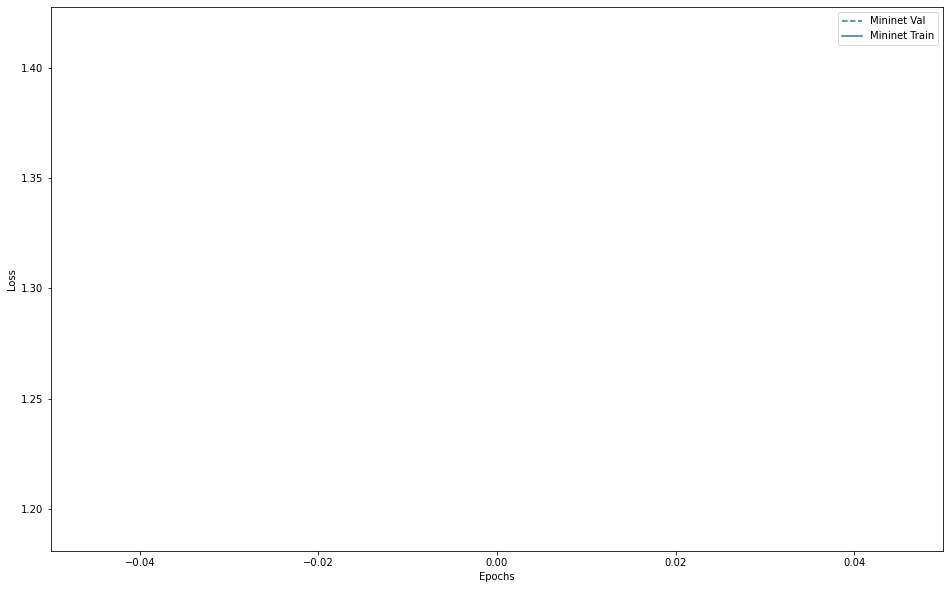

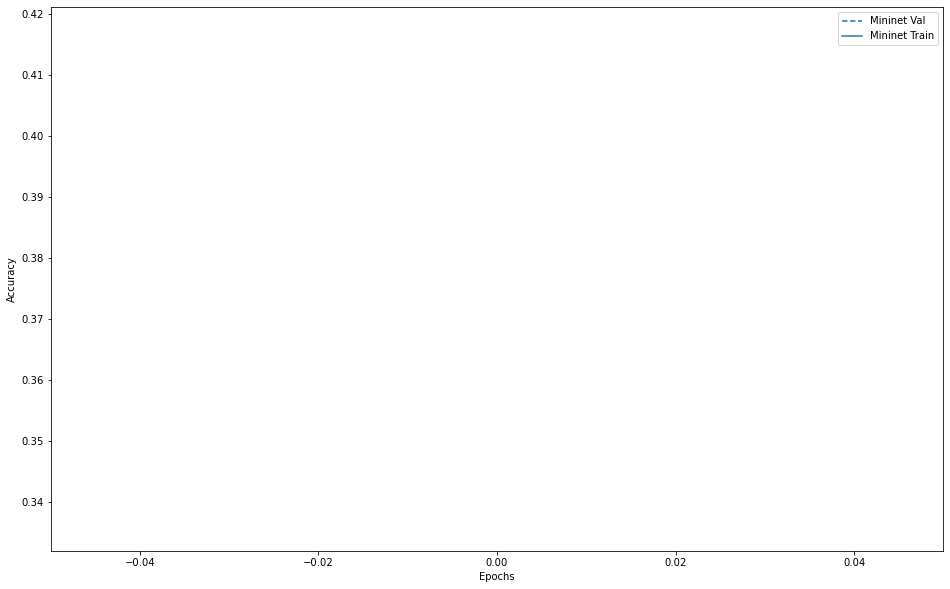

In [31]:
# 学習曲線を保存
visualization.plot_history('test.png', [('mininet', history)], key='loss')
visualization.plot_history('figure_accuracy.png', [('mininet', history)], key='accuracy')